# Preparing data for modelling

In this notebook we will be dropping certain columns and assessing multi-collinearity

We will encode categorical variables as dummies.

The accessibility score 'Score'(distance to 5th nearest venue) is applied to each listing depedning on which neighbourhood they are in, therefore we do not need geographical or venue data anymore.

In [7]:
### Import necessary modules

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Reading our cleaned, edited dataset
df = pd.read_csv(r'listings_model.csv', index_col=0)

In [9]:
#Need to drop first_review column -> otherwise way to many columns when generating dummies (creates one for each day)
pd.set_option('display.max_columns', None)
df.head()

,id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,av_price_last_year,med_price_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket
0,2015,2008-08-18,within an hour,90-99%,1.0,4.0,1.0,Brunnenstr. Süd,Mitte,Other,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60,200,30,1,28,4,1125,141,118,2016-04-11,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,4,414.0,1000.0,423.0,5,0,1,2,1,3989.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2-3 years,2-6 months,7.605,1.0,0.613699,81.900709,76.0,0,3,3,6,1
1,22677,2010-03-02,within an hour,100%,1.0,1.0,0.0,Brunnenstr. Süd,Mitte,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,160,150,40,4,35,3,24,228,223,2010-10-10,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,1,484.0,1000.0,286.0,7,0,1,2,1,3428.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4+ years,2-6 months,10.140,1.0,0.375342,157.236842,160.0,0,3,3,6,1
2,37052,2010-06-21,within a day,100%,1.0,2.0,0.0,Brunnenstr. Süd,Mitte,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,52,100,30,1,12,2,1125,25,307,2010-07-24,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,2,175.0,1000.0,939.0,5,0,0,2,1,3317.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,15.210,1.0,0.931507,47.560000,48.0,0,3,3,6,1
3,46172,2010-08-19,within a day,100%,0.0,2.0,1.0,Brunnenstr. Süd,Mitte,Other,Entire home/apt,2,1.0,1.0,2.0,Real Bed,48,500,50,1,0,60,600,264,38,2012-04-17,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,0,strict_14_with_grace_period,2,140.0,1000.0,914.0,3,0,1,0,1,3258.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,0.507,1.0,0.276712,48.000000,48.0,0,3,3,6,1
4,57209,2010-10-27,within an hour,100%,0.0,1.0,0.0,Brunnenstr. Süd,Mitte,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,80,250,75,2,15,3,360,264,160,2011-01-09,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,1,strict_14_with_grace_period,1,363.0,1000.0,212.0,7,1,2,2,1,3189.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,10.140,1.0,0.276712,80.719697,80.0,0,3,3,6,1


In [10]:
# Dropping variables no longer needed
df.drop(['host_since','neighbourhood_group_cleansed','first_review'], axis=1, inplace=True)
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,av_price_last_year,med_price_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket
0,2015,within an hour,90-99%,1.0,4.0,1.0,Brunnenstr. Süd,Other,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60,200,30,1,28,4,1125,141,118,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,4,414.0,1000.0,423.0,5,0,1,2,1,3989.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2-3 years,2-6 months,7.605,1.0,0.613699,81.900709,76.0,0,3,3,6,1
1,22677,within an hour,100%,1.0,1.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,160,150,40,4,35,3,24,228,223,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,1,484.0,1000.0,286.0,7,0,1,2,1,3428.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4+ years,2-6 months,10.140,1.0,0.375342,157.236842,160.0,0,3,3,6,1
2,37052,within a day,100%,1.0,2.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,52,100,30,1,12,2,1125,25,307,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,2,175.0,1000.0,939.0,5,0,0,2,1,3317.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,15.210,1.0,0.931507,47.560000,48.0,0,3,3,6,1
3,46172,within a day,100%,0.0,2.0,1.0,Brunnenstr. Süd,Other,Entire home/apt,2,1.0,1.0,2.0,Real Bed,48,500,50,1,0,60,600,264,38,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,0,strict_14_with_grace_period,2,140.0,1000.0,914.0,3,0,1,0,1,3258.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,0.507,1.0,0.276712,48.000000,48.0,0,3,3,6,1
4,57209,within an hour,100%,0.0,1.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,80,250,75,2,15,3,360,264,160,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,1,strict_14_with_grace_period,1,363.0,1000.0,212.0,7,1,2,2,1,3189.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,10.140,1.0,0.276712,80.719697,80.0,0,3,3,6,1


In [11]:
df['review_scores_rating'].isna().sum()

4242

In [12]:
print(len(df.index))

21934


# Price proxy

We have three variables describing price: price from the day data was scraped from AirBnb & average and median price from last 365 days (from calendar_summary.csv). Since they are differing between each other for individual listing (because of seasonal changes of price across the year), we take median of these three variables to have the most balanced proxy for the price for the ultimate analysis


In [13]:
# First, rename price column drom the day data was scraped
df.rename(columns={"price": "price_scraped"},inplace=True)

In [14]:
# Create new column - median of three available prices we have
df['price'] = df[['price_scraped','av_price_last_year','med_price_last_year']].median(axis=1)

In [15]:
# Check whether median calcualted correctly - yes
df[['price_scraped','av_price_last_year','med_price_last_year','price']].head(10)

,price_scraped,av_price_last_year,med_price_last_year,price
0,60,81.900709,76.0,76.0
1,160,157.236842,160.0,160.0
2,52,47.560000,48.0,48.0
3,48,48.000000,48.0,48.0
4,80,80.719697,80.0,80.0
5,70,70.000000,70.0,70.0
6,75,75.000000,75.0,75.0
7,80,NaN,NaN,80.0
8,79,81.000000,79.0,79.0
9,75,NaN,NaN,75.0


In [16]:
# Drop all price variables except final proxy 'price'
df.drop(['price_scraped','av_price_last_year','med_price_last_year'],axis=1, inplace=True)

In [17]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price
0,2015,within an hour,90-99%,1.0,4.0,1.0,Brunnenstr. Süd,Other,Entire home/apt,3,1.0,1.0,2.0,Real Bed,200,30,1,28,4,1125,141,118,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,4,414.0,1000.0,423.0,5,0,1,2,1,3989.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2-3 years,2-6 months,7.605,1.0,0.613699,0,3,3,6,1,76.0
1,22677,within an hour,100%,1.0,1.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,5,1.0,1.0,4.0,Real Bed,150,40,4,35,3,24,228,223,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,1,484.0,1000.0,286.0,7,0,1,2,1,3428.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4+ years,2-6 months,10.140,1.0,0.375342,0,3,3,6,1,160.0
2,37052,within a day,100%,1.0,2.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,100,30,1,12,2,1125,25,307,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,strict_14_with_grace_period,2,175.0,1000.0,939.0,5,0,0,2,1,3317.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,15.210,1.0,0.931507,0,3,3,6,1,48.0
3,46172,within a day,100%,0.0,2.0,1.0,Brunnenstr. Süd,Other,Entire home/apt,2,1.0,1.0,2.0,Real Bed,500,50,1,0,60,600,264,38,95-100/100,10/10,9/10,10/10,10/10,10/10,10/10,0,strict_14_with_grace_period,2,140.0,1000.0,914.0,3,0,1,0,1,3258.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4+ years,6-12 months,0.507,1.0,0.276712,0,3,3,6,1,48.0
4,57209,within an hour,100%,0.0,1.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,250,75,2,15,3,360,264,160,80-94/100,10/10,9/10,10/10,10/10,10/10,9/10,1,strict_14_with_grace_period,1,363.0,1000.0,212.0,7,1,2,2,1,3189.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,10.140,1.0,0.276712,0,3,3,6,1,80.0


# LTV proxy

We now want to create LTV (life-time value) proxy for each property so that we can rank them in terms of how valuable they are for AirBnb and renters themselves. Consequently, we will bin them to 3 groups (each with 33% distribution) and name they High, Mid and Low LTV. LTV proxy will be calculated by multiplying price by occupancy rate last year. LTV will not be interpretable in any way (e.g. expected revenue per year or month), other than a method to classify properties according to their value potential (price paid & popularity)

In [18]:
# Create LTV proxy
df['LTV'] = df['price']*df['occupancy_last_year']
df['LTV'].describe()

count    21934.000000
mean        45.182365
std         90.450688
min          0.000000
25%         22.000000
50%         35.000000
75%         55.000000
max       7846.575342
Name: LTV, dtype: float64

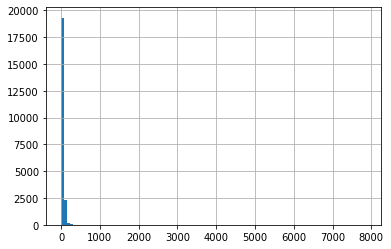

In [19]:
# Histogram of LTV - points up to around 200 seem to follow reasonable distribution, above seems outliers
df['LTV'].hist(bins=100)

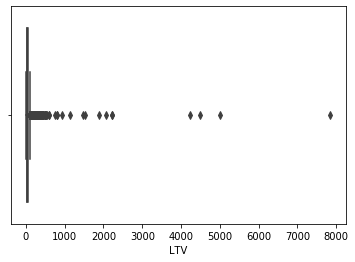

In [20]:
# Similar insights with boxplot graph
sns.boxplot(x=df['LTV'])

In [21]:
# 99th percentile of LTV equals 181.18, so we drop values above as they seem to be outliers
df['LTV'].quantile(.99)

181.18904109588948

In [22]:
# Remove outliers LTV from the dataset
df = df[df['LTV'] <= df['LTV'].quantile(.99)]

In [23]:
# Bin each property to appropriate category of LTV: High, Mid, Low (each represnting 33.3% of total)

# First, sort dataset according to LTV
df.sort_values(by='LTV',inplace=True)

# Bin properties into 3 bins with equal number of observations
bin_labels_3 = ['Low', 'Mid', 'High']
df['LTV_potential'] = pd.qcut(df['LTV'],
                              q=3,
                              labels=bin_labels_3)

In [24]:
my_tab = pd.crosstab(index=df["LTV_potential"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab # not exactly equal all bins around 33% of the dataset

col_0,count
LTV_potential,
Low,7238
Mid,7238
High,7238


In [25]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,bookings_per_month,occupancy_rate,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
15216,28658580,unknown,unknown,0.0,1.0,0.0,Ost 2,Other,Private room,4,1.0,1.0,4.0,Real Bed,0,0,1,0,14,1125,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,flexible,1,500.0,500.0,0.0,1,0,1,0,1,2815.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.00,0.0,0.0,1,0,0,1,0,149.0,0.0,Low
13813,3216901,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,4,1.0,1.0,4.0,Real Bed,0,0,1,49,1,7300,365,71,80-94/100,9/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,2,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,2-6 months,30.42,1.0,0.0,0,1,2,12,0,54.0,0.0,Low
13814,3223693,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,0,0,1,49,1,7300,365,113,80-94/100,9/10,10/10,10/10,9/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,2,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,30.42,1.0,0.0,0,1,2,12,0,54.0,0.0,Low
13816,3277004,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,0,0,1,49,1,7300,365,91,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,2,1,1875.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4+ years,2-6 months,30.42,1.0,0.0,0,1,2,12,0,54.0,0.0,Low
10233,4314353,unknown,unknown,0.0,1.0,0.0,Alexanderplatz,Apartment,Shared room,1,1.0,1.0,2.0,Real Bed,300,10,1,0,355,356,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,173.0,173.0,0.0,1,0,1,0,1,1773.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,0.0,0.0,0,2,1,1,0,45.0,0.0,Low


In [26]:
len(df.index)

21714

# Collinearity analysis

In [75]:
df.drop(['LTV'],axis=1,inplace=True)

In [76]:
# Now generating dummies for categorical varibles to enable multi-collinearity analysis
dummies_df = pd.get_dummies(df)

In [77]:
pd.set_option('display.max_columns', None)
dummies_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,ID_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,tableware,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,bookings_per_month,occupancy_rate,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,Neighbourhood_Adlershof,Neighbourhood_Albrechtstr.,Neighbourhood_Alexanderplatz,Neighbourhood_Allende-Viertel,Neighbourhood_Alt Treptow,Neighbourhood_Alt-Hohenschönhausen Nord,Neighbourhood_Alt-Hohenschönhausen Süd,Neighbourhood_Alt-Lichtenberg,Neighbourhood_Altstadt-Kietz,Neighbourhood_Barstraße,Neighbourhood_Biesdorf,Neighbourhood_Britz,Neighbourhood_Brunnenstr. Nord,Neighbourhood_Brunnenstr. Süd,Neighbourhood_Brunsbütteler Damm,Neighbourhood_Buchholz,Neighbourhood_Buckow,Neighbourhood_Buckow Nord,Neighbourhood_Charlottenburg Nord,Neighbourhood_Dammvorstadt,Neighbourhood_Drakestr.,Neighbourhood_Düsseldorfer Straße,Neighbourhood_Falkenhagener Feld,Neighbourhood_Fennpfuhl,Neighbourhood_Frankfurter Allee Nord,Neighbourhood_Frankfurter Allee Süd,Neighbourhood_Frankfurter Allee Süd FK,Neighbourhood_Friedenau,Neighbourhood_Friedrichsfelde Nord,Neighbourhood_Friedrichsfelde Süd,Neighbourhood_Gropiusstadt,Neighbourhood_Grunewald,Neighbourhood_Grünau,Neighbourhood_Halensee,Neighbourhood_Haselhorst,Neighbourhood_Heerstrasse,Neighbourhood_Heerstraße Nord,Neighbourhood_Hellersdorf-Nord,Neighbourhood_Hellersdorf-Ost,Neighbourhood_Hellersdorf-Süd,Neighbourhood_Helmholtzplatz,Neighbourhood_Johannisthal,Neighbourhood_Kantstraße,Neighbourhood_Karl-Marx-Allee-Nord,Neighbourhood_Karl-Marx-Allee-Süd,Neighbourhood_Karlshorst,Neighbourhood_Karow,Neighbourhood_Kaulsdorf,Neighbourhood_Kurfürstendamm,Neighbourhood_Kölln. Vorstadt/Spindlersf.,Neighbourhood_Köllnische Heide,Neighbourhood_Köpenick-Nord,Neighbourhood_Lankwitz,Neighbourhood_Lichtenrade,Neighbourhood_MV 1,Neighbourhood_MV 2,Neighbourhood_Mahlsdorf,Neighbourhood_Mariendorf,Neighbourhood_Marienfelde,Neighbourhood_Marzahn-Mitte,Neighbourhood_Marzahn-Süd,Neighbourhood_Mierendorffplatz,Neighbourhood_Moabit Ost,Neighbourhood_Moabit West,Neighbourhood_Neu Lichtenberg,Neighbourhood_Neu-Hohenschönhausen Nord,Neighbourhood_Neu-Hohenschönhausen Süd,Neighbourhood_Neue Kantstraße,Neighbourhood_Neuköllner Mitte/Zentrum,Neighbourhood_Niederschöneweide,Neighbourhood_Nord 1,Neighbourhood_Nord 2,Neighbourhood_Oberschöneweide,Neighbourhood_Osloer Straße,Neighbourhood_Ost 1,Neighbourhood_Ost 2,Neighbourhood_Ostpreußendamm,Neighbourhood_Otto-Suhr-Allee,Neighbourhood_Pankow Süd,Neighbourhood_Pankow Zentrum,Neighbourhood_Parkviertel,Neighbourhood_Plänterwald,Neighbourhood_Prenzlauer Berg Nord,Neighbourhood_Prenzlauer Berg Nordwest,Neighbourhood_Prenzlauer Berg Ost,Neighbourhood_Prenzlauer Berg Süd,Neighbourhood_Prenzlauer Berg Südwest,Neighbourhood_Regierungsviertel,Neighbourhood_Reuterstraße,Neighbourhood_Rixdorf,Neighbourhood_Rudow,Neighbourhood_Schillerpromenade,Neighbourhood_Schloß Charlottenburg,Neighbourhood_Schloßstr.,Neighbourhood_Schmargendorf,Neighbourhood_Schmöckwitz/Karolinenhof/Rauchfangswerder,Neighbourhood_Schöneberg-Nord,Neighbourhood_Schöneberg-Süd,Neighbourhood_Schönholz/Wilhelmsruh/Rosenthal,Neighbourhood_Siemensstadt,Neighbourhood_Spa

In [78]:
print(len(dummies_df.columns))

227


In [79]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

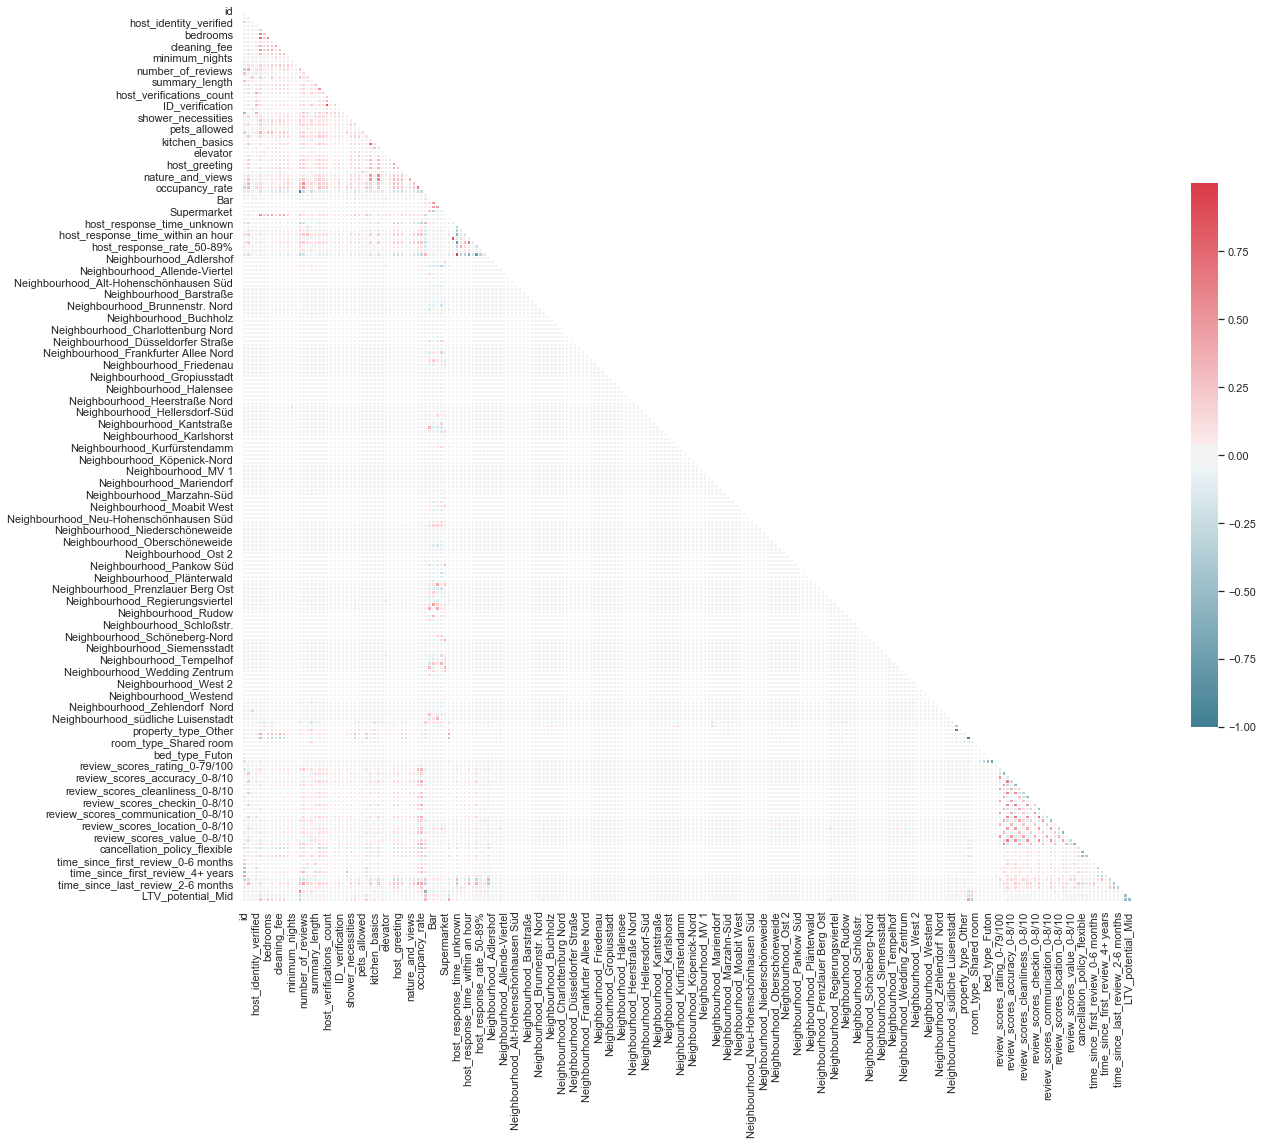

In [28]:
multi_collinearity_heatmap(dummies_df, figsize=(20,20))

As you can see above, there do not seem to be any major collinear relationships between neighbourhood variables, so we will proceed with another plot to produce a plot which will show the collinearity between the other features more clearly.

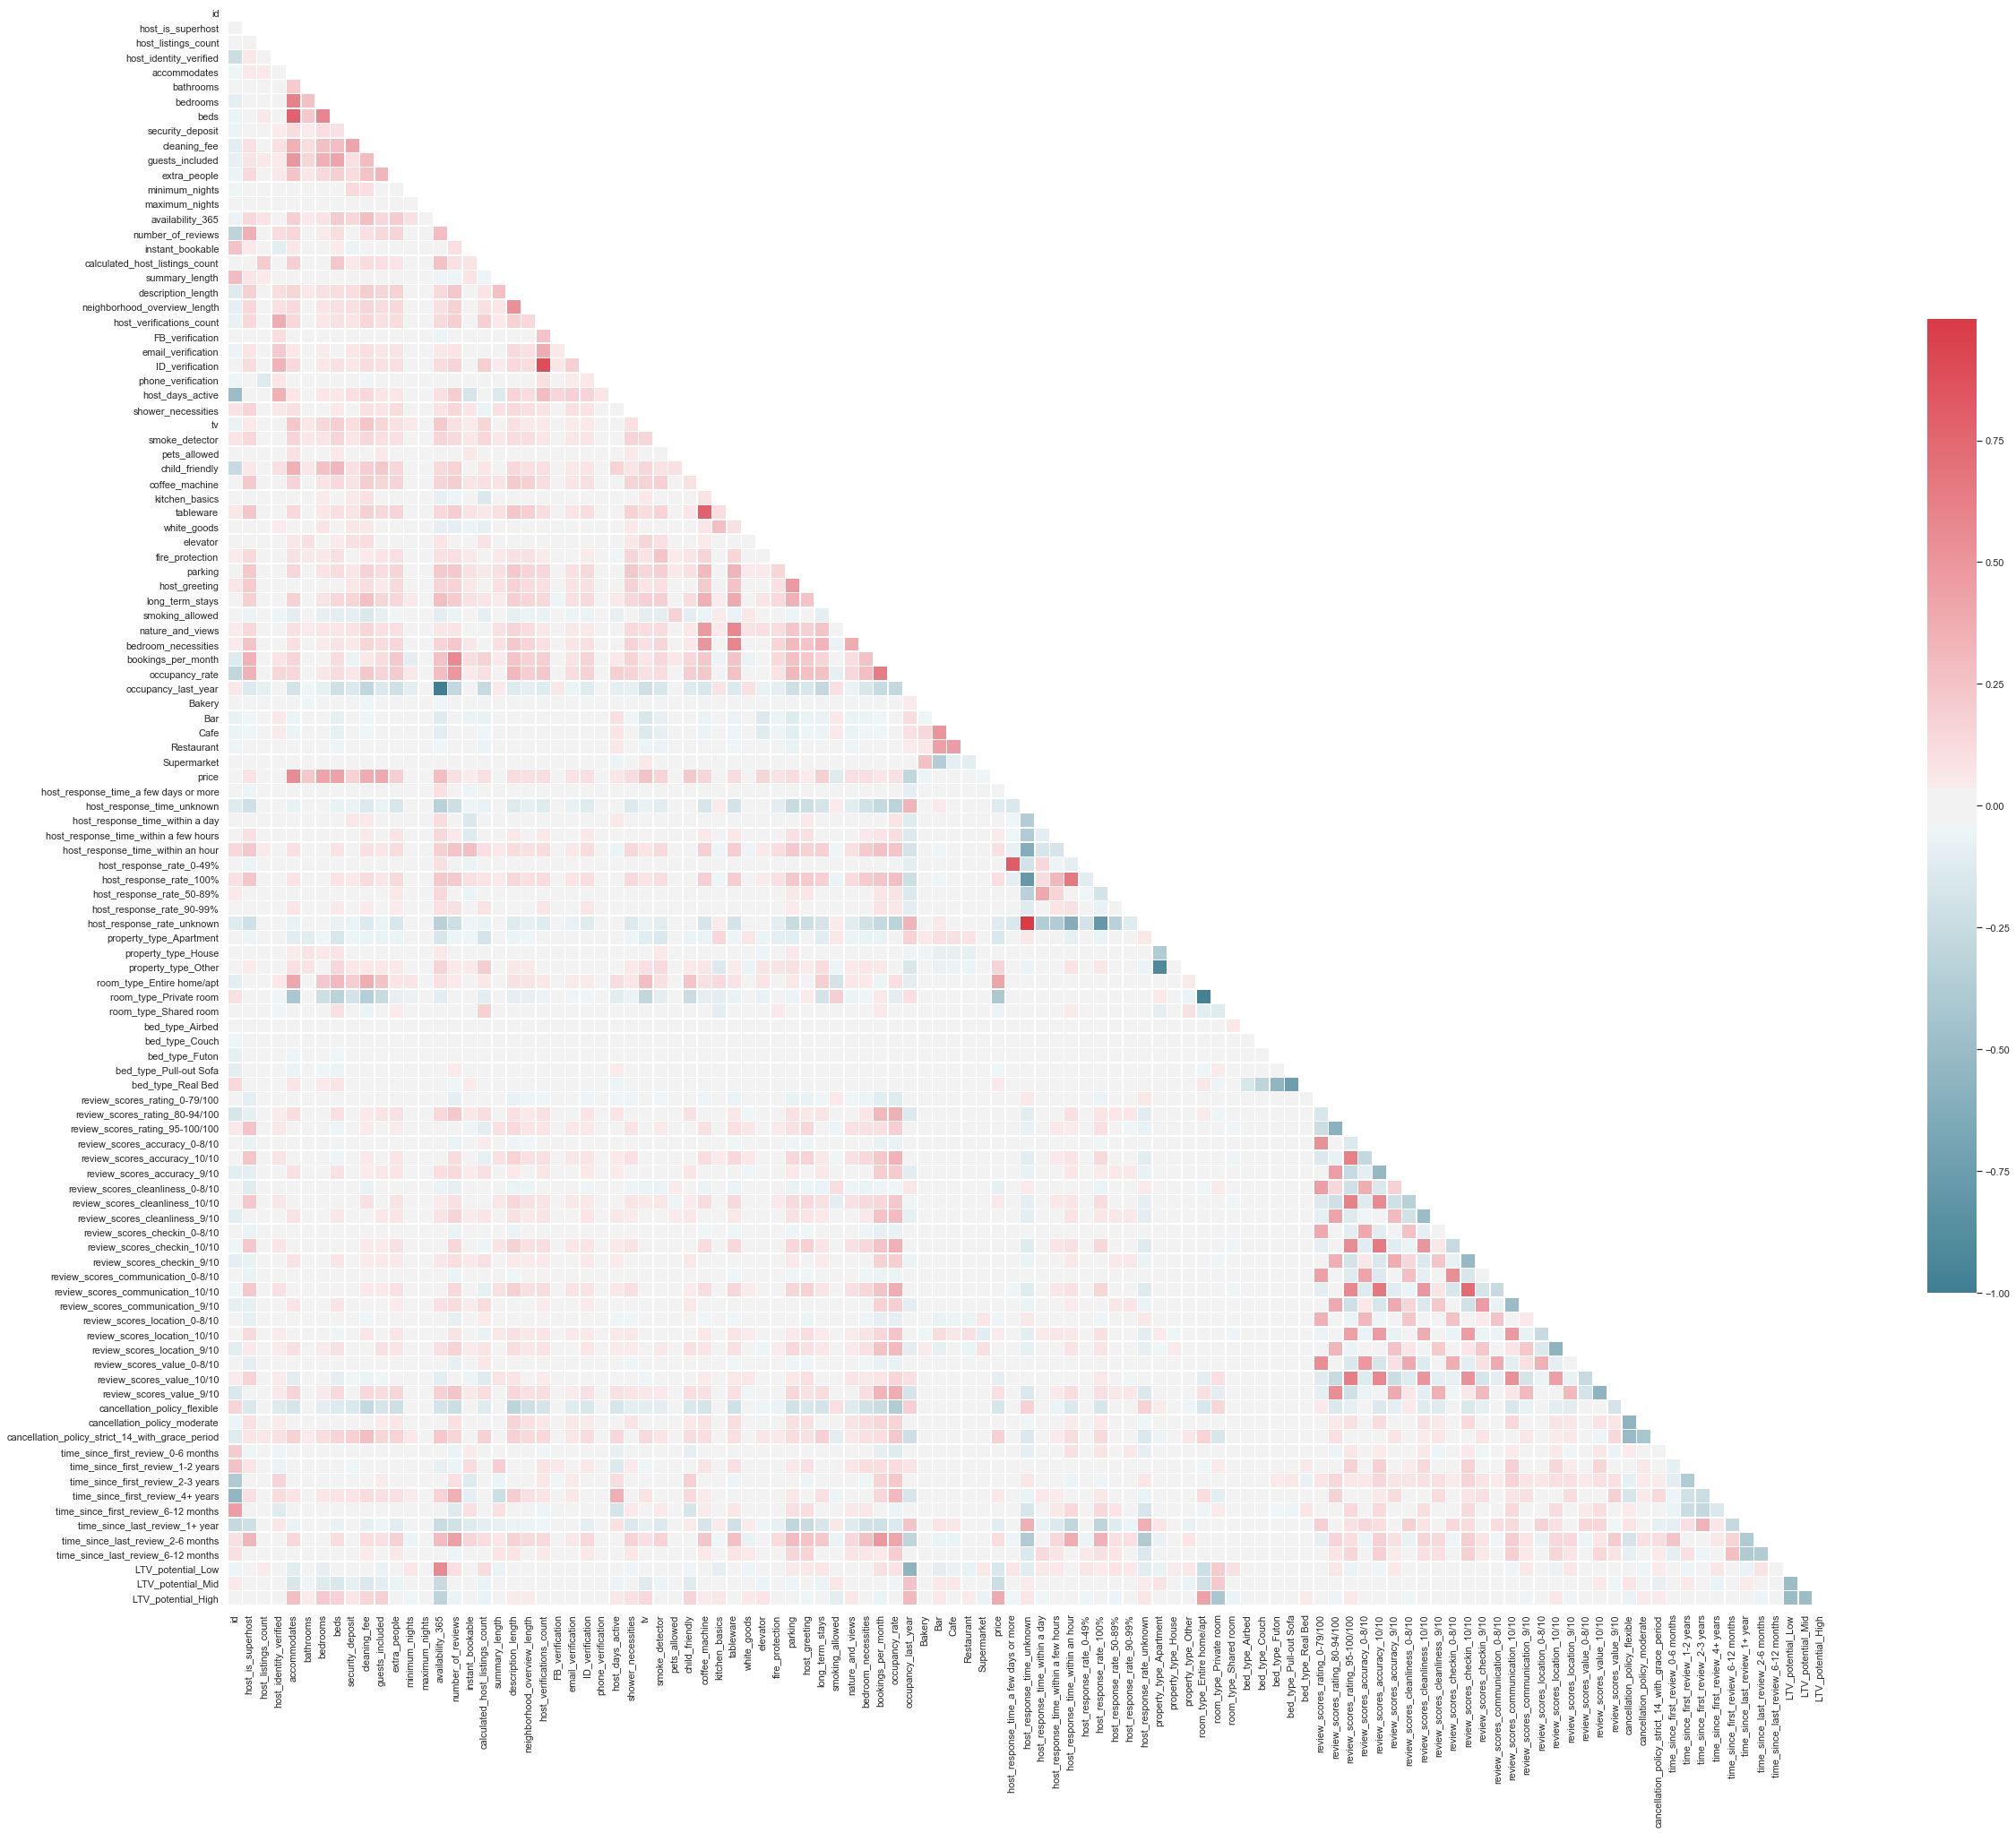

In [29]:
multi_collinearity_heatmap(dummies_df.drop(
    list(dummies_df.columns[dummies_df.columns.str.startswith('Neighbourhood')]), axis=1), figsize=(40,40))

Since the plot is super hard to read, below we just filter our variables by those that have collinearity higher than 0.75

According to this article (https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a), 0.7 and above indicates collinearity so we will be cautious and filter by collinearty higher than 0.6

Discussion Point -> 0.6 too high/low a value?


In [80]:
corr_val=0.6
df2 = dummies_df.corr().unstack().reset_index()

df3 = df2[abs(df2[0]) > corr_val]

In [81]:
pd.set_option('display.max_rows', None)
df3[df3[0] < 1]

,level_0,level_1,0
914,accommodates,bedrooms,0.601645
915,accommodates,beds,0.779449
1366,bedrooms,accommodates,0.601645
1593,beds,accommodates,0.779449
3224,availability_365,occupancy_last_year,-1.000000
4791,host_verifications_count,ID_verification,0.883714
5469,ID_verification,host_verifications_count,0.883714
7298,coffee_machine,tableware,0.776537
7750,tableware,coffee_machine,0.776537
10033,bookings_per_month,occupancy_rate,0.638562


Areas of multi-collinearity:

Beds, bedrooms and accomodate
- Beds, bedrooms and accomdates are highly correlated. The number of people accommodated has traditionally been a more high priority search parameter on Airbnb, as it is more relevant for private and shared rooms than the number of bedrooms (and is still the second highest priority parameter when searching on the site, after dates.

Occupancy Last year

- Extremely negatively correlated with availability so will drop availability_365

Verifications

- Verifications count and ID verifications highly correlated -> we will drop ID verifications as we think number of verifications is more important (contains more info)

Kitchen Utensils
- Coffee machine and tableware are also highly correlated. So we will drop tableware since coffee machine is usually the amenity which is more important to guests. (Discussion point)

Host Response Times
- host_response_time_unknown, host_time_within_an_hour, host_response_time_a few days or more

Host Response Rates
- The host response rates are also highly correlated(positive and negative)with the host reponse times. So we will drip all host response time variables since we think host_response rates are more important (as long as host eventually responds to request is better than if they do not respond at all)

Average & Median Price

- Highly correlated so we will have to drop one of these (also in general only available for one year so

Property types

- Apartments and other have high negative correlation with other property types. Other property types only compromise about 10% of the dataset so this will have to be dropped

Room types

- Again we have the problem that private rooms and entire home/apt are highly collinear, but these have very high impact on price -> what to do? (each compromise about half the dataset)


Bed Type
- Pull out sofas have a high negative correlation with real beds, but since pull out sofas only appear 450 times in the whole dataset they will be dropped

Review Scores
- There are some strong correlations between highly rated properties of different reviews categories - i.e. if a property gets a 10/10 for one category, it is likely to get a 10/10 for other categories. However, these will be left in for now and can be experimented with later to see if removing them improves the model.

In [82]:
df.room_type.value_counts()

Private room       11234
Entire home/apt    10203
Shared room          289
Name: room_type, dtype: int64

In [83]:
# Dropping collinear features
to_drop = ['beds',
           'tableware',
           'bedrooms',
           'host_response_time_unknown',
           'host_response_rate_unknown',
           'host_response_time_a few days or more',
           'bed_type_Pull-out Sofa',
           'room_type_Private room',
          'ID_verification',
          'bookings_per_month',
          'availability_365']

dummies_df.drop(to_drop, axis=1, inplace=True)

## Re-assessing multi-colinearity

In [84]:
corr_val=0.6
df4 = dummies_df.corr().unstack().reset_index()

df5 = df4[abs(df4[0]) > corr_val]

In [85]:
pd.set_option('display.max_rows', None)
df5[df5[0] < 1]

,level_0,level_1,0
10635,host_response_time_within an hour,host_response_rate_100%,0.658422
11065,host_response_rate_100%,host_response_time_within an hour,0.658422
37326,property_type_Apartment,property_type_Other,-0.913816
37756,property_type_Other,property_type_Apartment,-0.913816
39713,review_scores_rating_95-100/100,review_scores_accuracy_10/10,0.617319
39716,review_scores_rating_95-100/100,review_scores_cleanliness_10/10,0.603409
39728,review_scores_rating_95-100/100,review_scores_value_10/10,0.628755
40143,review_scores_accuracy_10/10,review_scores_rating_95-100/100,0.617319
40151,review_scores_accuracy_10/10,review_scores_checkin_10/10,0.652282
40154,review_scores_accuracy_10/10,review_scores_communication_10/10,0.670526


## Standardizing and Normalizing

In [56]:
numerical_columns = ['accommodates', 'bathrooms',
                     'cleaning_fee', 'extra_people', 'host_days_active', 
                     'host_listings_count', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'security_deposit','summary_length','description_length',
                    'neighborhood_overview_length']

In [57]:
dummies_df[numerical_columns].hist(figsize=(10,11));


NameError: name 'dummies_df' is not defined

Other than host_days_active and description length the remaining numerical features are all postively skewed and could benefit from log transformation.

In [88]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns 
                     if i not in ['host_days_active','description_length']] # Removing items not to be transformed

for col in numerical_columns:
    dummies_df[col] = dummies_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    dummies_df[col] = np.log(dummies_df[col])

This appears to have helped some of the distributions, although some (e.g. cleaning_fee, extra_people fee and security_fee) contain a large number of 0s, which means these features are not normally distributed. Most importantly, however, the target variable price now appears much more normally distributed.

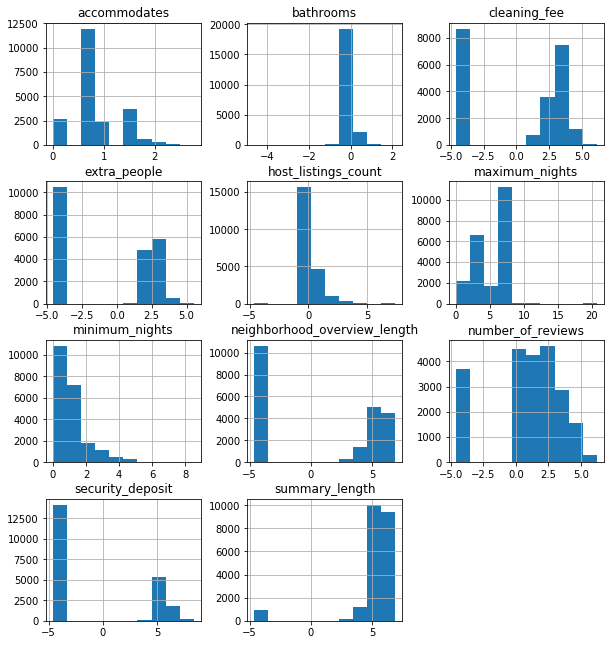

In [89]:
dummies_df[numerical_columns].hist(figsize=(10,11));

Finally, the predictive features X and the target feature y can be separated, and X will be scaled. StandardScaler from sklearn will be used, but the type of scaling used could be experimented with later to see if alternative versions yield better results.

That is, we’ll separate the features and the target variable for modeling. We will assign the features (explanatory variables) to X and the target variable to y. We use scaler.fit_transform(), as mentioned above, to transform the y variable for the model. transformed_df.drop([features], axis=1) tells pandas which columns we want to exclude. We won’t include price for obvious reasons, and ID is just an index with no relationship to price.

# Creating a dataset without dummies because BigML can handle categorical values

In [27]:
corr_val=0.6
df6 = df.corr().unstack().reset_index()

df7 = df6[abs(df6[0]) > corr_val]

In [28]:
pd.set_option('display.max_rows', None)
df7[df7[0] < 1]

,level_0,level_1,0
222,accommodates,bedrooms,0.601203
223,accommodates,beds,0.779039
328,bedrooms,accommodates,0.601203
382,beds,accommodates,0.779039
802,availability_365,occupancy_last_year,-1.000000
1158,host_verifications_count,ID_verification,0.883682
1317,ID_verification,host_verifications_count,0.883682
1762,coffee_machine,tableware,0.776219
1868,tableware,coffee_machine,0.776219
2421,bookings_per_month,occupancy_rate,0.638633


In [29]:
to_drop1 = ['beds',
           'tableware',
           'bedrooms',
          'ID_verification',
          'bookings_per_month',
          'availability_365',
          'occupancy_rate']

In [30]:
#Drop columns no longer needed
df.drop(to_drop1,axis=1,inplace=True)

In [31]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,bathrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
15216,28658580,unknown,unknown,0.0,1.0,0.0,Ost 2,Other,Private room,4,1.0,Real Bed,0,0,1,0,14,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,flexible,1,500.0,500.0,0.0,1,0,1,1,2815.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,1,0,0,1,0,149.0,0.0,Low
13813,3216901,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,4,1.0,Real Bed,0,0,1,49,1,7300,71,80-94/100,9/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13814,3223693,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,2,1.0,Real Bed,0,0,1,49,1,7300,113,80-94/100,9/10,10/10,10/10,9/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13816,3277004,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,1,1.0,Real Bed,0,0,1,49,1,7300,91,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
10233,4314353,unknown,unknown,0.0,1.0,0.0,Alexanderplatz,Apartment,Shared room,1,1.0,Real Bed,300,10,1,0,355,356,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,173.0,173.0,0.0,1,0,1,1,1773.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0,2,1,1,0,45.0,0.0,Low


In [32]:
#Dropping Nan Values
df.dropna(inplace=True)

In [33]:
df.isna().sum()

id                                0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_listings_count               0
host_identity_verified            0
Neighbourhood                     0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bed_type                          0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
cancellation_policy         

In [34]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,bathrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
13813,3216901,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,4,1.0,Real Bed,0,0,1,49,1,7300,71,80-94/100,9/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13814,3223693,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,2,1.0,Real Bed,0,0,1,49,1,7300,113,80-94/100,9/10,10/10,10/10,9/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13816,3277004,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,1,1.0,Real Bed,0,0,1,49,1,7300,91,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13866,7947601,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,2,1.0,Real Bed,0,0,1,54,1,1125,5,80-94/100,9/10,10/10,9/10,9/10,10/10,10/10,0,moderate,7,283.0,1000.0,378.0,5,0,1,1,1875.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2-3 years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
272,9968692,within a few hours,100%,0.0,3.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,4,1.5,Real Bed,2000,72,1,0,90,1125,1,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,moderate,3,463.0,997.0,154.0,5,0,1,1,1321.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2-3 years,1+ year,0.0,0,3,3,6,1,150.0,0.0,Low


In [24]:
numerical_columns = ['accommodates', 'bathrooms','guests_included',
                     'cleaning_fee', 'extra_people', 'host_days_active', 
                     'host_listings_count', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'security_deposit','summary_length','description_length',
                    'neighborhood_overview_length']

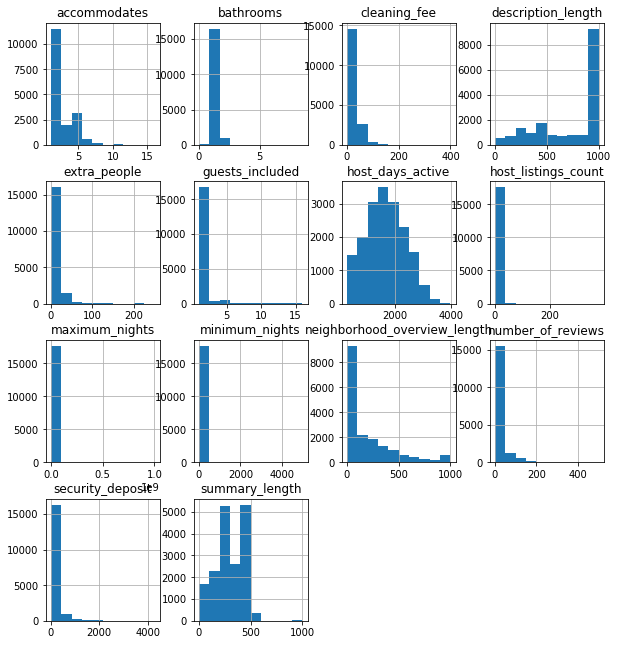

In [25]:
df[numerical_columns].hist(figsize=(10,11));

In [35]:
my_tab = pd.crosstab(index=df["LTV_potential"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab # not exactly equal all bins around 33% of the dataset

col_0,count
LTV_potential,
Low,5835
Mid,5839
High,5809


In [36]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,bathrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
13813,3216901,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,4,1.0,Real Bed,0,0,1,49,1,7300,71,80-94/100,9/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13814,3223693,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,2,1.0,Real Bed,0,0,1,49,1,7300,113,80-94/100,9/10,10/10,10/10,9/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13816,3277004,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,1,1.0,Real Bed,0,0,1,49,1,7300,91,80-94/100,10/10,10/10,10/10,10/10,10/10,9/10,0,moderate,7,250.0,1000.0,414.0,5,0,1,1,1875.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,4+ years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
13866,7947601,within a few hours,90-99%,0.0,7.0,1.0,Südliche Friedrichstadt,Apartment,Private room,2,1.0,Real Bed,0,0,1,54,1,1125,5,80-94/100,9/10,10/10,9/10,9/10,10/10,10/10,0,moderate,7,283.0,1000.0,378.0,5,0,1,1,1875.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2-3 years,2-6 months,0.0,0,1,2,12,0,54.0,0.0,Low
272,9968692,within a few hours,100%,0.0,3.0,0.0,Brunnenstr. Süd,Apartment,Entire home/apt,4,1.5,Real Bed,2000,72,1,0,90,1125,1,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,moderate,3,463.0,997.0,154.0,5,0,1,1,1321.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2-3 years,1+ year,0.0,0,3,3,6,1,150.0,0.0,Low


In [37]:
print(len(df.index))

17483


In [73]:
# Save cleaned for modelling
df.to_csv(r'listings_clustering.csv', header=True)

In [38]:
df['occupancy_last_year'].describe()

count    17483.000000
mean         0.768418
std          0.330319
min          0.000000
25%          0.602740
50%          0.978082
75%          1.000000
max          1.000000
Name: occupancy_last_year, dtype: float64

In [39]:
df['LTV'].describe()

count    17483.000000
mean        41.128221
std         29.631632
min          0.000000
25%         21.917808
50%         35.000000
75%         54.849315
max        180.821918
Name: LTV, dtype: float64